In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

Problem 1. 
Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

2.0061
1.24710175607


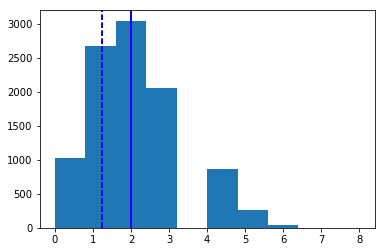

In [2]:
pop1 = np.random.binomial(10, 0.2, 10000)
print(pop1.mean())
print(pop1.std())
plt.hist(pop1)
plt.axvline(pop1.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(pop1.std(), color='b', linestyle='dashed', linewidth=2)


4.9859
1.55932715939


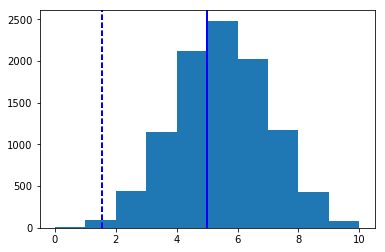

In [3]:
pop2 = np.random.binomial(10,0.5, 10000) 
print(pop2.mean())
print(pop2.std())
plt.hist(pop2)
plt.axvline(pop2.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(pop2.std(), color='b', linestyle='dashed', linewidth=2)

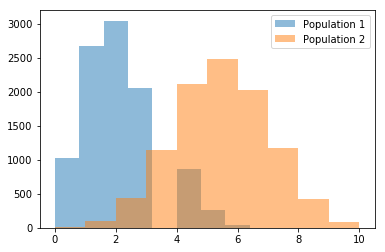

In [4]:
plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()


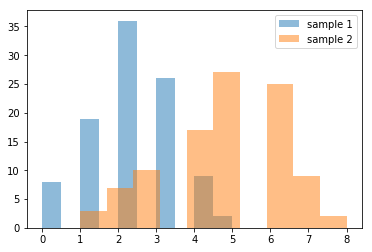

2.15
4.79
1.13468057179
1.55753009602


In [9]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()


print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())


Increasing the size of the samples should decrease the standard error as we saw from the calculations where "To combine the variances, The squared standard deviations are divided by the sample size and summed, then we take the square root of the sum." So as the sample size increases, the standard error should decrease. Conversely, decreasing the sample size should increase the standard error. However, I guess the instructions don't say to calculate the standard error, so maybe it's a moot point. 

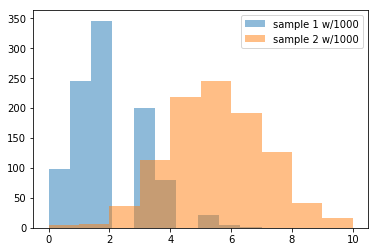

2.012
5.039
1.22059657545
1.60918581898


In [10]:
sample1k = np.random.choice(pop1, 1000, replace=True)
sample2k = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1k, alpha=0.5, label='sample 1 w/1000') 
plt.hist(sample2k, alpha=0.5, label='sample 2 w/1000') 
plt.legend(loc='upper right') 
plt.show()

print(sample1k.mean())
print(sample2k.mean())
print(sample1k.std())
print(sample2k.std())


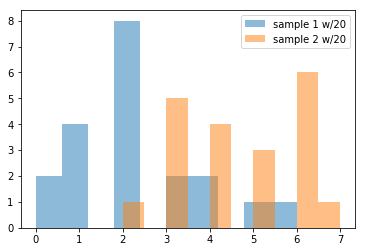

2.25
4.55
1.51244834623
1.3955285737


In [12]:
sample1a = np.random.choice(pop1, 20, replace=True)
sample2a = np.random.choice(pop2, 20, replace=True)

plt.hist(sample1a, alpha=0.5, label='sample 1 w/20') 
plt.hist(sample2a, alpha=0.5, label='sample 2 w/20') 
plt.legend(loc='upper right') 
plt.show()

print(sample1a.mean())
print(sample2a.mean())
print(sample1a.std())
print(sample2a.std())

I would've thought that there'd be more variation in the samples with smaller sample sizes, but it's hard to make that claim. With repeated sampling and calculation of the means, that would be the case according to the central limit theorem.

Problem 2. 
Change the population value p for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the population value p for group 1 to 0.4, and do it again. What changes, and why?

Changing p from 0.3 to 0.4 will bring the means for the two samples closer together. This should result in a smaller T-statistic and a larger p-value. 

2.9892
1.43348643523


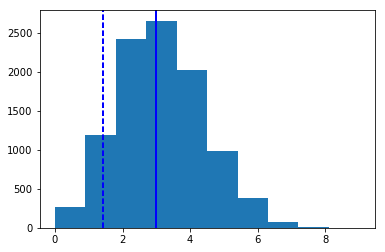

In [13]:
pop1 = np.random.binomial(10, 0.3, 10000)
print(pop1.mean())
print(pop1.std())
plt.hist(pop1)
plt.axvline(pop1.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(pop1.std(), color='b', linestyle='dashed', linewidth=2)


In [14]:
sample1 = np.random.choice(pop1, 100, replace=True)

diff=sample2.mean() - sample1.mean()
print(diff)

1.66


In [15]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])


In [16]:
diff_se = sum(sd ** 2 / size) ** 0.5  


In [17]:
print(diff/diff_se)

7.80884706588


In [18]:
print(ttest_ind(sample2, sample1, equal_var=False))


Ttest_indResult(statistic=7.7697047288398897, pvalue=4.2454631605117632e-13)


The p-value is quite small, so we would conclude that the samples are not from the same distribution. Also, there should be more overlap than there was initially.

3.9994
1.56160162654
0.77
3.39450876106
Ttest_indResult(statistic=3.3774935723995747, pvalue=0.00088113656241097904)


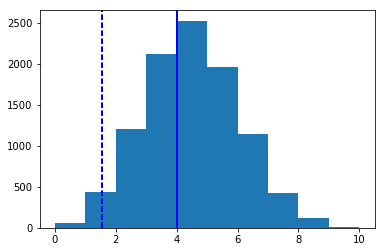

In [19]:
pop1 = np.random.binomial(10, 0.4, 10000)
print(pop1.mean())
print(pop1.std())
plt.hist(pop1)
plt.axvline(pop1.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(pop1.std(), color='b', linestyle='dashed', linewidth=2)


sample1 = np.random.choice(pop1, 100, replace=True)

diff=sample2.mean() - sample1.mean()
print(diff)


size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

diff_se = sum(sd ** 2 / size) ** 0.5  

print(diff/diff_se)
print(ttest_ind(sample2, sample1, equal_var=False))


As expected, the T-statistic is smaller and the p-value is larger since it more difficult to say with certainty that the samples come from different distributions. 
Graphing both should show more overlap.


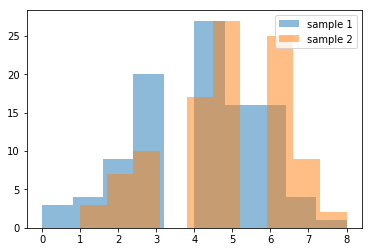

In [20]:
plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

Problem 3.
Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

I'll try a skewed distribution like exponential. I'm not sure how useful this will be since, with too much skew, the data may overlap too much at the left side. 

1.95911670947
1.95984508021


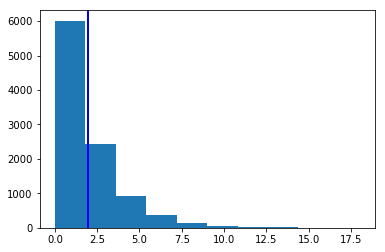

In [22]:
pop1 = np.random.exponential(2, 10000)
print(pop1.mean())
print(pop1.std())
plt.hist(pop1)
plt.axvline(pop1.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(pop1.std(), color='b', linestyle='dashed', linewidth=2)


5.01135019128
5.007946528


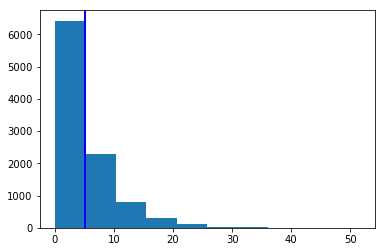

In [24]:
pop2 = np.random.exponential(5, 10000) 
print(pop2.mean())
print(pop2.std())
plt.hist(pop2)
plt.axvline(pop2.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(pop2.std(), color='b', linestyle='dashed', linewidth=2)


For the populations, we get the expected means (the parameter used in the exponential call)

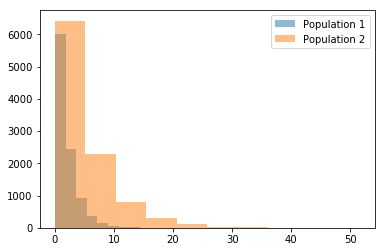

In [25]:
plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()


2.23280865158
4.87583673303


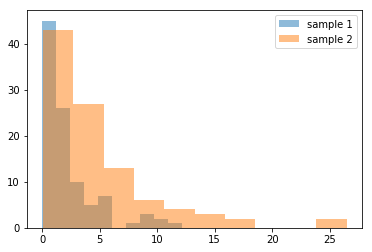

In [28]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)
print(sample1.mean())
print(sample2.mean())

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()


It does look like the sample mean values do represent the population values. 